In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn import linear_model
from copy import deepcopy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import ARDRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import linear_model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
filtered_citroen_audi_7_25k_df = pd.read_csv("filtered_citroen_audi_7_25k_df.csv").dropna()

In [4]:
filtered_citroen_audi_7_25k_df[filtered_citroen_audi_7_25k_df["car_model"]=="c3"].corr()["sale_price"]

registration_year    0.864625
km_to_date          -0.765919
sale_price           1.000000
car_age             -0.864625
km_age_ratio         0.208475
Name: sale_price, dtype: float64

In [5]:
filtered_citroen_audi_7_25k_df[filtered_citroen_audi_7_25k_df["car_model"]=="a1"].corr()["sale_price"]

registration_year    0.904930
km_to_date          -0.807842
sale_price           1.000000
car_age             -0.904930
km_age_ratio         0.325978
Name: sale_price, dtype: float64

We find a strong correlation between sale_price and km/age of the car for CITROEN then for AUDI. There's a difference but its not significant.

## Separate the data in C3 and A1 models

In [6]:
filtered_citroen_7_25k_df = filtered_citroen_audi_7_25k_df[filtered_citroen_audi_7_25k_df["car_model"]=="c3"]

In [7]:
filtered_audi_7_25k_df = filtered_citroen_audi_7_25k_df[filtered_citroen_audi_7_25k_df["car_model"]=="a1"]

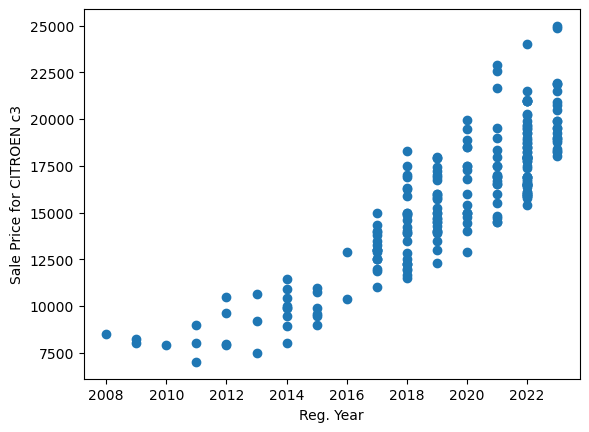

In [8]:
plt.scatter(filtered_citroen_7_25k_df["registration_year"], filtered_citroen_7_25k_df["sale_price"])
plt.xlabel("Reg. Year")
plt.ylabel("Sale Price for CITROEN c3")
plt.show()

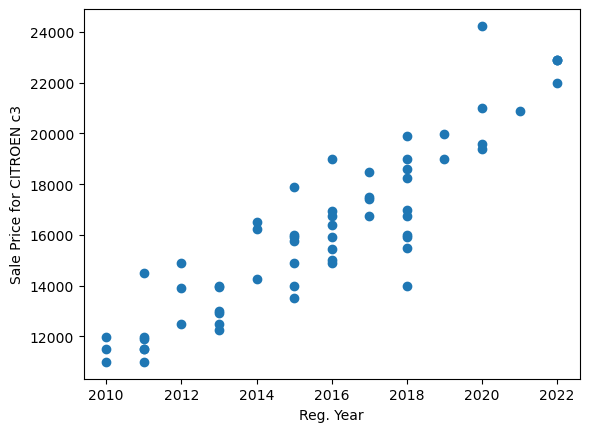

In [9]:
plt.scatter(filtered_audi_7_25k_df["registration_year"], filtered_audi_7_25k_df["sale_price"])
plt.xlabel("Reg. Year")
plt.ylabel("Sale Price for CITROEN c3")
plt.show()

## Machine Learning - Multiple Regression - CITROEN C3

In [10]:
Xc = filtered_citroen_7_25k_df[["registration_year", "km_to_date"]]
yc = filtered_citroen_7_25k_df["sale_price"] 

regr_citroen = linear_model.LinearRegression()
regr_citroen.fit(Xc, yc) 

#predict for 2015 car with 90.000km
predicted_citroen_price = regr_citroen.predict([[2015, 90000]])

print(predicted_citroen_price)


[11849.22931351]


We have a prediction of 11849.23€ for a CITROEN C3 car with 90.000km for a 2015 registration year.

In [11]:
print(regr_citroen.coef_)

[ 8.16873196e+02 -1.26930878e-02]


We have a coef_ of [ 8.16873196e+02 -1.26930878e-02]

## Machine Learning - Multiple Regression - AUDI A1

In [12]:
Xa = filtered_audi_7_25k_df[["registration_year", "km_to_date"]]
ya = filtered_audi_7_25k_df["sale_price"] 

regr_audi = linear_model.LinearRegression()
regr_audi.fit(Xa, ya) 

#predict for 2015 car with 90.000km
predicted_audi_price = regr_audi.predict([[2015, 90000]])

print(predicted_audi_price)

[16227.53555391]


We have a prediction of 16227.54€ for a AUDI A1 car with 90.000km for a 2015 registration year.

Going to the website where we got out dataframe, we only have 1 car available:


Audi A1 1.6 TDI Sport - 2015 · 93 000 km · 105 cv - 17.900€


In [13]:
print(regr_audi.coef_)

[ 6.85706506e+02 -1.74147266e-02]


We have a coef_ of [ 6.85706506e+02 -1.74147266e-02]

## coef_ analysis:

# Regarding KM:

AUDI - (-1.74147266e-02)
CITROEN - (-1.26930878e-02)

We can say that for a AUDI A1, the price decreses mor for every KM.

# Regarding registration year:

AUDI - (6.85706506e+02)
CITROEN - (8.16873196e+02)

We can say the same for registration year. 

## Machine Learning - Multi Linear Regression Model

From now on, we will go only for CITROEN C3 Model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(filtered_citroen_7_25k_df[["registration_year", "km_to_date"]], filtered_citroen_7_25k_df["sale_price"], test_size=0.3, random_state=42)

In [15]:
df_to_input_c3 = filtered_citroen_7_25k_df[['registration_year', 'km_to_date', 'sale_price']]
X_train, X_test, y_train, y_test = train_test_split(df_to_input_c3[['registration_year', 'km_to_date']], df_to_input_c3['sale_price'], test_size=0.2, random_state=50)

sklearn_model = LinearRegression().fit(X_train, y_train)

registration_year = int(input("Enter registration year: "))
km_to_date = int(input("Enter kilometers driven to date: "))

user_input = np.array([[registration_year, km_to_date]])

initial_price_sklearn = sklearn_model.predict(user_input)[0]

print(f"Initial Predicted car price (Linear Regression): €{initial_price_sklearn:.2f}")


Initial Predicted car price (Linear Regression): €11905.83


We have a prediction of 11905.83€ for a CITROEN C3 car with 90.000km for a 2015 registration year.

## Machine Learning - K-Nearest Neighbors Regressor Model

With user input:

In [16]:
# Train the K-Nearest Neighbors Regressor model
knregressor = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

# User Input
registration_year = int(input("Enter registration year: "))
km_to_date = int(input("Enter kilometers driven to date: "))

user_input = np.array([[registration_year, km_to_date]])

# Make a prediction with K-Nearest Neighbors Regressor
initial_price_knregressor = knregressor.predict(user_input)[0]

# Print the prediction
print(f"Predicted car price (KNN Regressor Model): €{initial_price_knregressor:.2f}")


Predicted car price (KNN Regressor Model): €16820.00


We have a prediction of €13900.00€ for a CITROEN C3 car with 90.000km for a 2015 registration year.

## Machine Learning - Random Forest Model

In [17]:
# Create and train the Random Forest Regressor
regr = RandomForestRegressor(max_depth=4, random_state=0).fit(X_train, y_train)

# Assuming you have collected user input for 'registration_year' and 'km_to_date'
registration_year = int(input("Enter registration year: "))
km_to_date = int(input("Enter kilometers driven to date: "))

user_input = np.array([[registration_year, km_to_date]])

# Make a prediction using the trained Random Forest model
initial_price_rforest = regr.predict(user_input)[0]

# Print the predicted car price
print(f"Predicted car price (Random Forest): €{initial_price_rforest:.2f}")


Predicted car price (Random Forest): €9505.25


We have a prediction of 10188.78€ for a CITROEN C3 car with 90.000km for a 2015 registration year.

## Machine Learning - ARD Model

In [18]:
# Create and train the ARD Regression model
clf = ARDRegression().fit(X_train, y_train)

# Assuming you have collected user input for 'registration_year' and 'km_to_date'
registration_year = int(input("Enter registration year: "))
km_to_date = int(input("Enter kilometers driven to date: "))

user_input = np.array([[registration_year, km_to_date]])

# Make a prediction using the trained ARD Regression model
initial_price_ARD = clf.predict(user_input)[0]

# Print the predicted car price
print(f"Predicted car price (ADR): €{initial_price_ARD:.2f}")


Predicted car price (ADR): €11871.22


# Car details used for prediction:
## Registration year - 2015
## km to date - 90.000km

### Multi Linear Regression - 11905.83€
### KN Regressor - 13900.00€
### R. Forest - 10188.78€
### ADR Model - 11489.35€

In [19]:
#Metrics for the Linear Regression model
mae_sklearn = mean_absolute_error(y_test, sklearn_model.predict(X_test))
mse_sklearn = mean_squared_error(y_test, sklearn_model.predict(X_test))
r2_sklearn = r2_score(y_test, sklearn_model.predict(X_test))

#Metrics for the KNN Regressor model
mae_knregressor = mean_absolute_error(y_test, knregressor.predict(X_test))
mse_knregressor = mean_squared_error(y_test, knregressor.predict(X_test))
r2_knregressor = r2_score(y_test, knregressor.predict(X_test))

#Metrics for the Random Forest model
mae_rforest = mean_absolute_error(y_test, regr.predict(X_test))
mse_rforest = mean_squared_error(y_test, regr.predict(X_test))
r2_rforest = r2_score(y_test, regr.predict(X_test))

#Metrics for the ADR model
mae_ARD = mean_absolute_error(y_test, clf.predict(X_test))
mse_ARD = mean_squared_error(y_test, clf.predict(X_test))
r2_ARD = r2_score(y_test, clf.predict(X_test))


print("Linear Regression Model Metrics:")
print(f"MAE: {mae_sklearn:.2f}")
print(f"MSE: {mse_sklearn:.2f}")
print(f"R-squared: {r2_sklearn:.2f}")

print("KNN Regressor Model Metrics:")
print(f"MAE: {mae_knregressor:.2f}")
print(f"MSE: {mse_knregressor:.2f}")
print(f"R-squared: {r2_knregressor:.2f}")

print("Random Forest Model Metrics:")
print(f"MAE: {mae_rforest:.2f}")
print(f"MSE: {mse_rforest:.2f}")
print(f"R-squared: {r2_rforest:.2f}")

print("ADR Model Metrics:")
print(f"MAE: {mae_ARD:.2f}")
print(f"MSE: {mse_ARD:.2f}")
print(f"R-squared: {r2_ARD:.2f}")


Linear Regression Model Metrics:
MAE: 1491.50
MSE: 3414739.49
R-squared: 0.74
KNN Regressor Model Metrics:
MAE: 1963.68
MSE: 6186288.68
R-squared: 0.53
Random Forest Model Metrics:
MAE: 1430.12
MSE: 3279791.14
R-squared: 0.75
ADR Model Metrics:
MAE: 1493.22
MSE: 3440874.18
R-squared: 0.74


# Conclusion:

We have this car with:

Citroën C3 1.2 PureTech Seduction - 2015 · 93 000 km · 82 cv, 10.000€

We can say that R. Forest performs the best and KN Regressor the worst. 


Linear Regression Model Metrics:

    MAE - The average absolute error is €1491.50, which says how far the predictions are from the actual prices.
    R-squared - An R2 value of 0.74 says that the model explains about 74% of the variance in the DF, which is good.


KNN Regressor Model Metrics:

    A R-squared value of 0.53 suggests that it explains less of the variance in the DF compared to the Linear Regression model. Also MAE and MSE are higher.

Random Forest Model Metrics:

    A R-squared value of 0.75 indicating that it explains about 75% of the variance in the DF, which is a good fit.
    Also a lower MAE and MSE then the Linear Regression says it performs better. 

ADR Model Metrics:

    Performance is similar to the Linear Model. 

In [20]:
filtered_citroen_7_25k_df.to_csv("filtered_citroen_7_25k_df.csv", index=False)